In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt

for i in [pd, np, scipy, mpl]:
    print(i.__name__, i.__version__)

pandas 0.25.1
numpy 1.18.5
scipy 1.5.2
matplotlib 3.5.3


# 2-4 가설 검정 -  모평균

In [2]:
from scipy.stats import norm, t

## 1. 단일 모집단의 평균

모집단의 평균($\mu_0$)에 대한 검정입니다.

$H_0: \mu = \mu_0$

$H_1: $

|대립 가설|검정 종류|
|---|---|
|$$H_1: \mu < \mu_0$$|좌측 꼬리(left)|
|$$H_1: \mu > \mu_0$$|우측 꼬리(right)|
|$$H_1: \mu \ne \mu_0$$|양쪽 꼬리(two-sided)|

### Z 검정

#### 가정

- 모분산($\sigma^2$)을 알고 있고, 모집단이 정규 분포를 따르거나, 중심극한정리를 적용할  만큼의 충분한 표본의 수(보통 25개 이상)일 경우

#### 증거의 확률 분포 및 통계량

$H_0$이 맞다면, 

> $\mu_{\bar{X}}=\mu_0$, $\sigma^2_{\bar{X}}=\frac{\sigma^2}{n}$ 

확률 분포와 검정 통계량

> $\bar{X} \sim N(\mu_0, \frac{\sigma^2}{n})$

> $Z = \frac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}\sim N(0, 1)$ 

------------------------------

**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

이마의 온도를 측정하여 체온을 구하는 온도계가 있습니다. 이 체온계는 동일한 센서로 16번의 측정을 하여 평균값을 온도로 출력합니다.

이 온도계의 센서로 실제 체온이 36.5도를 잴 경우 0.4도의 표준편차가 있다고 합니다. 이를 바탕으로 0.4를 모표준편차라고 가정합니다.

체온이 36.5보다 높을 경우 알람을 울리는 기능을 만든다고 합니다. 유의 수준을 0.05로 할 때, 다음 센서 출력이 왔을 때의 알람 여부를 구하세요.

```
    36.27, 37.10, 36.81, 36.10, 36.47, 37.36, 35.73, 36.53, 
    37.21, 36.35, 36.43, 36.66, 37.30, 36.44, 36.52, 36.53
```
    
</div>

$H_0: \mu = 36.5$

$H_1: \mu > 36.5$

$Z = \frac{\bar{X}-36.5}{0.4/\sqrt{n}}\sim N(0, 1)$

**우측 검정** 입니다.

In [3]:
X = [36.27, 37.10, 36.81, 36.10, 36.47, 37.36, 35.73, 36.53,
    37.21, 36.35, 36.43, 36.66, 37.30, 36.44, 36.52, 36.53]

X_bar = np.mean(X) # 표본평균 
mu_X_bar = 36.5 # 표본평균의 모평균
n = len(X)
sigma_X_bar = 0.4 / (n ** 0.2) # 표본평균의 모표준편차

Z = (X_bar - mu_X_bar) / sigma_X_bar # 검정통계량

print("검정통계량(Z): {}, pvalue: {}".format(Z, norm.sf(Z))) # sf = 1 - cdf

검정통계량(Z): 0.49240516236435533, pvalue: 0.3112164752929236


$H_0$ not Rejected → 알람을 울리지 않습니다.

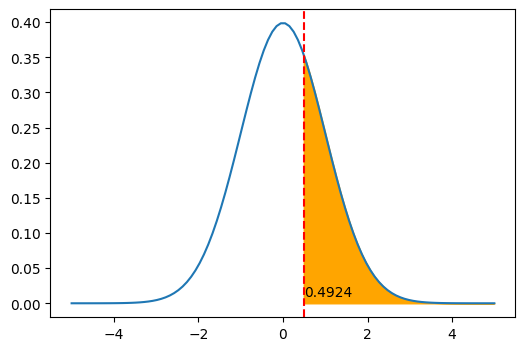

In [4]:
plt.figure(figsize=(6, 4))

plt.plot(np.linspace(-5, 5, 100), norm.pdf(np.linspace(-5, 5, 100)))
plt.axvline(Z, color='red', linestyle='--')
plt.text(Z, 0.01, str(Z)[:6])
plt.fill_between(np.linspace(Z, 5, 100), np.zeros(shape=100),
                norm.pdf(np.linspace(Z, 5, 100)), color='orange')
plt.show()

#### 비율 Z 검정(Propotional Z-test)

- 베르누이 분포의 성질과 중심극한 정리를 이용한 검정입니다.


- 이진형 확률 변수의 1인 비율 $p$에  대한 검정입니다.

$H_0: p = p_0$

$H_1:$

|대립 가설|검정 종류|
|---|---|
|$$H_1: p < p_0$$|좌측 꼬리(left)|
|$$H_1: p > p_0$$|우측 꼬리(right)|
|$$H_1: p \ne p+0$$|양쪽 꼬리(two-sided)|

$p$ = 모집단에서 1인 개수 / 모집단의 수 = 모집단의 합 / 모집단의 수

$\bar{p}$ = 표본에서 1인 개수 / 전체 표본수 = 표본의 합 / 전체 표본수

즉, 베르누이 분포인 경우에 1인 표본 비율은 표본 평균로 간주 할 수 있습니다.

**증거의 확률 분포 및 통계량**

$H_0$가 맞다면,

> $p=p_0$ 입니다. 베르누이 분포의 성질에 의해, $\sigma_p^2=p(1-p)$ 입니다.
>
> 중심극한정리를 적용할 수 있을 만큼 표본수가 충분하다면, 
>
> $H_0$이 맞다는 가정으로, 모분산까지 가정할 수 있어, Z 검정을 적용할 수 있게 됩니다. 

확률 분포와 검정 통계량

> $\bar{p} \sim N(p_0, \frac{p_0(1-p_0)}{n})$, n: 표본수
>
> $Z = \frac{\bar{p} - p_0}{\sqrt{p_0(1-p_0)/n}} \sim N(0, 1)$

--------------------

**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

A 백신 회사에서는 모든 종류의 독감 바이러스에 대한 항체를 포함할 수 없으니, 

그 해의 백신에 포함될 독감 바이러스 항체를 결정하기 위해 사람들이 보유하고 있는 항체를 조사합니다. 

먼저 후보군을 선택하여 포함 유무를 판단하고자 합니다.

조사 결과 10% 이상 항체를 보유하고 있을 확률이 95% 초과한다면 후보에서 제외합니다 

Z 독감 바이러스 항체 보유 여부를 1600 명의 사람을 조사한 결과, 165 명이 항체를 보유한 것으로 나타났습니다.

Z 독감 바이러스 항체를 독감 백신에 포함 시킬 후보에 포함시킬지 판단해 봅니다.

</div>

$H_0: p = 0.1$

$H_1: p > 0.1$

$Z = \frac{\bar{p}-0.1}{\sqrt{0.1(1 - 0.1)/n}}\sim N(0, 1)$

**우측 검정** 입니다.

In [5]:
p_bar = 165 / 1600

p = 0.1
n = 1600
sigma_p = (p * (1 - p) / n) ** 0.5

Z = (p_bar - p) / sigma_p

print("검정통계량(Z): {}, pvalue: {}".format(Z, norm.sf(Z))) # sf = 1 - cdf

검정통계량(Z): 0.41666666666666513, pvalue: 0.3384611195106902


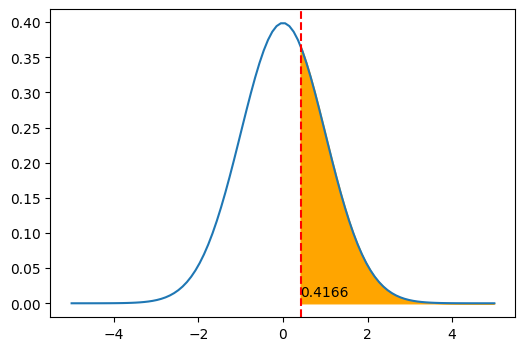

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(np.linspace(-5, 5, 100), norm.pdf(np.linspace(-5, 5, 100)))
plt.axvline(Z, color='red', linestyle='--')
plt.text(Z, 0.01, str(Z)[:6])
plt.fill_between(np.linspace(Z, 5, 100), np.zeros(shape=100),
                norm.pdf(np.linspace(Z, 5, 100)), color='orange')
plt.show()

$H_0$ not Rejected → 후보에서 제외하지 않습니다.

In [7]:
#  statsmodels.stats.proportion.proportions_ztest는 위 검정에 대한 기능을 제공합니다.
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(
    165, # count:양성(1)인 경우의 수
    1600, # nobs: 표본수
    0.1, # value: 모비율
    'larger', # alternative: 대립 검정 종류 
    0.1 # 모분산을 계산할 때의 모비율
)

(0.41666666666666513, 0.3384611195106902)

### t 검정

**가정**

1. 모집단이 정규 분포를 따릅니다.


2. 각 표본은 서로 독립입니다.

-----------------------------

**증거의 확률 분포 및 통계량**

$H_0$가 맞다면,

> $\mu_{\bar{X}}=\mu$

확률 분포와 검정 통계량

> $t = \frac{\bar{X} - \mu}{s/\sqrt{n}} \sim t(n - 1)$, n: 표본수

**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

흑맥주 공장에서 맥주의 품질 검사를 하려고 합니다. 

흑맥주 출하직전에 발효통을 골고루 섞으면서 8잔을 받아, 각 잔의 알코올 도수를 측정합니다. 

흑맥주의 알코올 도수가 6.5가 아니면 불합격으로 판정을 하는데요. 유의 수준을 5%로 한다면,

8잔의 관측값이 다음과 같이 나왔을 때, 해당 발효통의 품질 결과를 판단해봅니다.

알코올 측정 결과는 정규분포를 따르고 각 잔의 결과는 서로 독립입니다.

```
6.03, 6.55, 6.37, 5.92, 6.16, 6.71, 5.69, 6.19
```
</div>

$H_0: \mu = 6.5$

$H_1: \mu \ne 6.5$

$t = \frac{\bar{X} - 6.5}{s/\sqrt{n}} \sim t(n - 1)$

**양측 검정** 입니다.

In [8]:
X = [6.03, 6.55, 6.37, 5.92, 6.16, 6.71, 5.69, 6.19]

X_bar = np.mean(X)
mu_X_bar = 6.5
n = len(X)
S = np.std(X, ddof=1) # 표본 평균을 사용합니다.
t_stat = -abs(X_bar - mu_X_bar) / (S / (n ** 0.5)) # 양측 검정이고 대칭이라 좌측 확률 영역의 통계량을 구합니다.
print("검정통계량(t): {}, pvalue: {}".format(t_stat, t.cdf(t_stat, df=n - 1) * 2))

검정통계량(t): -2.5198844093376693, pvalue: 0.039817266144350286


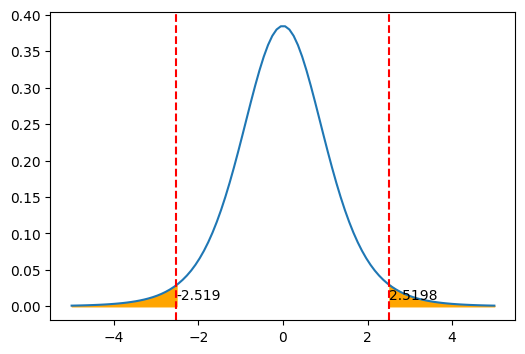

In [9]:
plt.figure(figsize=(6, 4))

plt.plot(np.linspace(-5, 5, 100), t.pdf(np.linspace(-5, 5, 100), df=n - 1))

plt.axvline(t_stat, color='red', linestyle='--')
plt.text(t_stat, 0.01, str(t_stat)[:6])
plt.fill_between(np.linspace(-5, t_stat, 100), np.zeros(shape=100),
                t.pdf(np.linspace(-5, t_stat, 100), df=n - 1), color='orange')

plt.axvline(-t_stat, color='red', linestyle='--')
plt.text(-t_stat, 0.01, str(-t_stat)[:6])
plt.fill_between(np.linspace(-t_stat, 5, 100), np.zeros(shape=100),
                t.pdf(np.linspace(-t_stat, 5, 100), df=n - 1), color='orange')
plt.show()

$H_0$ Rejected → 통과 실패입니다.

In [10]:
# scipy.stats.ttest_1samp 기능을 제공합니다.
# 검정장 버젼에서는 양측 검정만 지원됩니다. 
from scipy.stats import ttest_1samp

ttest_1samp(X, 6.5)

Ttest_1sampResult(statistic=-2.5198844093376693, pvalue=0.039817266144350286)

## 2. 서로 다른 두 모집단의 평균

서로 다른 두 개 범주에 속한 모집단의 평균 $\mu_1$, $\mu_2$ 에 대한 검정

$H_0: \mu_1 = \mu_2$

$H_1:$

|대립 가설|검정 종류|
|---|---|
|$$H_1: \mu_1 < \mu_2$$|좌측 꼬리(left)|
|$$H_1: \mu_1 > \mu_2$$|우측 꼬리(right)|
|$$H_1: \mu_1 \ne \mu_2$$|양쪽 꼬리(two-sided)|


### t-독립성 검정

**가정**

1. 모집단은 정규분포를 따릅니다.


2. 각 표본들은 서로 독립입니다.

-----------------------

가설검정을 아래와 같이 바꿀 수 있습니다.

$H_0: \mu_1 - \mu_2 = 0$

$H_1:$

|대립 가설|검정 종류|
|---|---|
|$$H_1: \mu_1 - \mu_2 < 0$$|좌측 꼬리(left)|
|$$H_1: \mu_1 - \mu_2 > 0$$|우측 꼬리(right)|
|$$H_1: \mu_1 - \mu_2 \ne 0$$|양쪽 꼬리(two-sided)|

#### Case 1: 모분산이 동일한 경우

**증거의 확률 분포 및 통계량**

$H_0$가 맞다면, 

> $\mu_1 - \mu_2$도 정규 분포를 따릅니다.

확률 분포와 검정 통계량

두 표집의 표본분산 이 $S_1^2, S_2^2$ 라고 하고, 표본수를 $n_1, n_2$ 라고 하면

> $S_p^2 = \frac{(n_1 - 1)S_1^2 + (n_2 - 1)S_2^2}{n_1 + n_2 - 2}$ ← 통합 분산(Pooled variance)라고 합니다.

> $t = \frac{\bar{X_1} - \bar{X_2}}{S_p\sqrt{1/n_1 + 1/n_2}} \sim t(n_1 + n_2 - 2)$


**유도 과정**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

$\frac{\bar{X_1} - \bar{X_2}}{S_p\sqrt{1/n_1 + 1/n_2}} = \frac{\frac{\bar{X_1} - \bar{X_2}}{\sigma}}{\frac{S_p}{\sigma}\sqrt{1/n_1 + 1/n_2}}$

$   = \frac{\frac{\bar{X_1} - \bar{X_2}}{\sigma\sqrt{1/n_1 + 1/n_2}}}{\frac{S_p}{\sigma}}$

$   = \frac{Z}{\sqrt{\frac{(n_1 + n_2 - 2)S_p^2}{(n_1 + n_2 - 2)\sigma^2}}} \sim \frac{Z}{\sqrt{\frac{\chi_{n_1 + n_2 - 2}^2}{n_1 + n_2 - 2}}} \sim t(n_1 + n_2 - 2)$

> $X_1$와 $X_2$ 는 독립이므로 $\bar{X_1}, \bar{X_2}$ 독립입니다. 
>
> 따라서, $V(\bar{X_1} - \bar{X_2}) = V(\bar{X_1}) + (-1)^2V(\bar{X_2})$
>
> $V(\bar{X_1} - \bar{X_2}) = \frac{\sigma^2}{n_1} + \frac{\sigma^2}{n_2}=\sigma^2(1/n_1 + 1/n_2)$, $\sigma^2$: 모분산
>
> $\frac{(n_1 + n_2 - 2)S_p^2}{\sigma^2} \sim \chi^2(n_1 + n_2 - 2)$

</div>

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

동일한 모델의 배터리의 성능이 북반구와 남반구에서 차이가 있는지를 검정하고자 합니다. 

북반구에 있는 실험실 A, 남반구에 있는 실험실 B에서 동일한 모델의 배터리를 

동일한 여건으로 성능 지속시간을 측정하였습니다. 

북반구와 남반구에서 성능이 차이가 있는지 판단해봅니다. (유의 수준 5%)

표본들의 성능 측정은 독립적으로 이루어집니다. 성능 지속 시간을 정규 분포를 따릅니다.

또한 모분산은 같다고 가정합니다.

북반구의 지속시간

```
7.57, 8.40, 8.11, 7.40, 7.77, 8.66, 7.03, 7.83, 8.51, 7.65, 7.73, 7.96
```


남반구의 지속시간

```
8.07, 8.65, 8.01, 7.65, 7.54, 7.75, 7.46, 7.67, 7.95, 8.64
```
    
</div>

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 \ne \mu_2$

$S_p^2 = \frac{(n_1 - 1)S_1^2 + (n_2 - 1)S_2^2}{n_1 + n_2 - 2} $

$t = \frac{\bar{X_1} - \bar{X_2}}{S_p\sqrt{1/n_1 + 1/n_2}} \sim t(n_1 + n_2 - 2)$

**양측 검정** 입니다.

In [11]:
X1 = [7.57, 8.40, 8.11, 7.40, 7.77, 8.66, 7.03, 7.83, 8.51, 7.65, 7.73, 7.96]
X2 = [8.07, 8.65, 8.01, 7.65, 7.54, 7.75, 7.46, 7.67, 7.95, 8.64]

X1_bar, X2_bar = np.mean(X1), np.mean(X2)
S1_sq, S2_sq = np.var(X1, ddof=1), np.var(X2, ddof=1)
n1, n2 = len(X1), len(X2)
Sp_sq = ((n1 - 1) * S1_sq + (n2 - 1) * S2_sq) / (n1 + n2 - 2)

# 대칭 분포인 t-분포의 확률 분포에서 좌측 통계량을 모든 경우를 고려해서 구하기 위해 -abs를 적용합니다.
t_stat = -abs((X1_bar - X2_bar) / np.sqrt(Sp_sq * (1 / n1 + 1 / n2)))
print("검정통계량(t): {}, pvalue: {}".format(t_stat, t.cdf(t_stat, df=n1 + n2 - 2) * 2))

검정통계량(t): -0.2794606763724717, pvalue: 0.7827609222936273


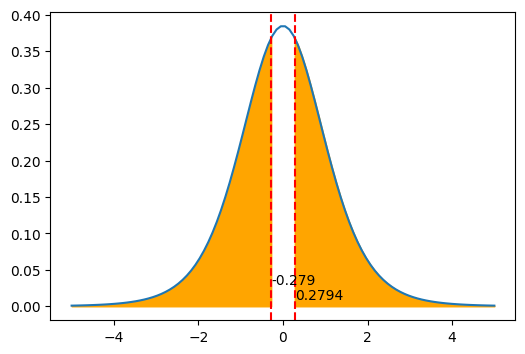

In [12]:
plt.figure(figsize=(6, 4))

plt.plot(np.linspace(-5, 5, 100), t.pdf(np.linspace(-5, 5, 100), df=n - 1))

plt.axvline(t_stat, color='red', linestyle='--')
plt.text(t_stat, 0.03, str(t_stat)[:6])
plt.fill_between(np.linspace(-5, t_stat, 100), np.zeros(shape=100),
                t.pdf(np.linspace(-5, t_stat, 100), df=n - 1), color='orange')

plt.axvline(-t_stat, color='red', linestyle='--')
plt.text(-t_stat, 0.01, str(-t_stat)[:6])
plt.fill_between(np.linspace(-t_stat, 5, 100), np.zeros(shape=100),
                t.pdf(np.linspace(-t_stat, 5, 100), df=n - 1), color='orange')
plt.show()

$H_0$ not Rejected → 같습니다.

In [13]:
# scipy.stats.ttest_ind 기능을 제공합니다.
# 검정장 버젼에서는 양측 검정만 지원됩니다. 
from scipy.stats import ttest_ind

ttest_ind(X1, X2, equal_var=True)

Ttest_indResult(statistic=-0.2794606763724717, pvalue=0.7827609222936273)

#### Case 2: 모분산이 다를 경우

웰치 t-검정(Welch's t-Test)라고도 합니다.

**증거의 확률 분포 및 통계량**

$\nu  = \frac{\left(S_1^2/n_1 + S_2^2/n_2\right)^2}{\left(\frac{S_1^2}{n_1}\right)^2/(n_1 - 1) + \left(\frac{S_2^2}{n_2}\right)^2/(n_2 - 1)}$

$t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{S_1^2/n_1 + S_2^2/n_2}} \sim t(\nu)$

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

데이터사이언스 강의는 오전과 오후 두 반으로 나누어 강의가 진행됩니다.

모두 동일한 내용이고, 강사도 같고 성적은 같다는 생각이 지배적입니다.

일부 수강생의 성적을 가지고, 오전 / 오후 반의 성적에 차이가 있는지를 판단해봅니다. (유의 수준 5%)

성적은 정규 분포를 따르고, 수강생의 성적 각각은 독립임을 가정합니다.

오전반의 성적

```
75, 94, 88, 71, 80, 100, 63, 81, 96
```

오후반의 성적

```
69, 94, 85, 64, 75, 100, 53, 77, 97, 72, 74, 81, 99, 74, 77, 77
```
    
</div>

$H_0: \mu_1 = \mu_2$

$H_1: \mu_1 \ne \mu_2$

$\nu  = \frac{\left(S_1^2/n_1 + S_2^2/n_2\right)^2}{\left(\frac{S_1^2}{n_1}\right)^2/(n_1 - 1) + \left(\frac{S_2^2}{n_2}\right)^2/(n_2 - 1)}$

$t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{S_1^2/n_1 + S_2^2/n_2}} \sim t(\nu)$

**양측 검정** 입니다.

In [14]:
X1 = [75, 94, 88, 71, 80, 100, 63, 81, 96]
X2 = [69, 94, 85, 64, 75, 100, 53, 77, 97, 72, 74, 81, 99, 74, 77, 77]

X1_bar, X2_bar = np.mean(X1), np.mean(X2)
S1_sq, S2_sq = np.var(X1, ddof=1), np.var(X2, ddof=1)
n1, n2 = len(X1), len(X2)

nu_denom =  ((S1_sq / n1) ** 2) / (n1 - 1) + ((S2_sq / n2) ** 2) / (n2 - 1)
nu  = ((S1_sq / n1 + S2_sq / n2) ** 2) / nu_denom

t_stat = -abs((X1_bar - X2_bar) / np.sqrt(S1_sq / n1 + S2_sq / n2))
print("검정통계량(t): {}, pvalue: {}".format(t_stat, t.cdf(t_stat, df=nu) * 2))

검정통계량(t): -0.7340659707882282, pvalue: 0.47263123929211803


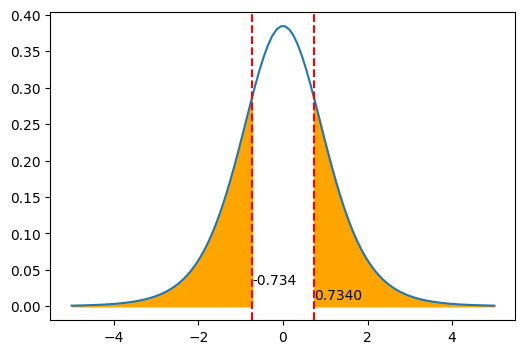

In [15]:
plt.figure(figsize=(6, 4))

plt.plot(np.linspace(-5, 5, 100), t.pdf(np.linspace(-5, 5, 100), df=n - 1))

plt.axvline(t_stat, color='red', linestyle='--')
plt.text(t_stat, 0.03, str(t_stat)[:6])
plt.fill_between(np.linspace(-5, t_stat, 100), np.zeros(shape=100),
                t.pdf(np.linspace(-5, t_stat, 100), df=n - 1), color='orange')

plt.axvline(-t_stat, color='red', linestyle='--')
plt.text(-t_stat, 0.01, str(-t_stat)[:6])
plt.fill_between(np.linspace(-t_stat, 5, 100), np.zeros(shape=100),
                t.pdf(np.linspace(-t_stat, 5, 100), df=n - 1), color='orange')
plt.show()

$H_0$ not Rejected → 같습니다.

In [16]:
# scipy.stats.ttest_ind 기능을 제공합니다.
# 검정장 버젼에서는 양측 검정만 지원됩니다. 
from scipy.stats import ttest_ind

ttest_ind(X1, X2, equal_var=False)

Ttest_indResult(statistic=0.7340659707882282, pvalue=0.47263123929211803)

### Mann-Whitney U 검정

모집단에 대한 가정이 필요하지 않은 비모수 검정법입니다.

순위를 기반으로 한 검정법으로, 모집단의 평균에 대한 비교라기 보다는 대소 관계에 대한 비교를 판단합니다.

$H_0: P(X_1 > X_2) = P(X_1 < X_2)$(두 모집단은 동일한 분포를 지녔다)

$H_1:$

|대립 가설|검정 종류|
|---|---|
|$$H_1: P(X_1 > X_2) < P(X_1 < X_2)$$ (모집단 1이 모집단 2 보다 작은 영역에 분포한다.)|좌측 꼬리(left)|
|$$H_1: P(X_1 > X_2) > P(X_1 < X_2)$$ (모집단 1이 모집단 2 보다 큰 영역에 분포한다.)|우측 꼬리(right)|
|$$H_1: P(X_1 > X_2) \ne P(X_1 < X_2)$$ (모집단 1이 모집단 2 보다 다른 영역에 분포한다.)|양쪽 꼬리(two-sided)|


**가정**

모든 표본은 각각이 독립적입니다.

**증거의 확률 분포 및 통계량**

$X_1, X_2$ 를 합친 상태에서 순위를 구합니다. (1위부터 시작)

$U_1 = R_1 - \frac{n_1(n_1 + 1)}{2}$, $R_1$: X_1의 순위의 합

$U_2 = R_2 - \frac{n_2(n_2 + 1)}{2}$, $R_2$: X_2의 순위의 합

$U = min(U_1, U_2) \sim N(\frac{n_1n_2}{2}, \frac{n_1n_2(n_1 + n_2 + 1)}{12})$ 근사적으로 정규분포를 따릅니다.

$Z = \frac{U - n_1n_2/2}{\sqrt{n_1n_2(n_1 + n_2 + 1)/12}} \sim N(0, 1)$

**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

A부서와 임직원의 나이와 B부서의 임직원 나이의 차이를 비교해 봅니다.

A부서

```
25, 35, 38, 49, 51, 43, 29, 54
```

B부서

```
28, 42, 45, 31, 48, 43, 25, 55, 33
```
    
</div>

$H_0: P(X_1 > X_2) = P(X_1 < X_2)$(두 모집단은 동일한 분포를 지녔다)

$H_1: P(X_1 > X_2) \ne P(X_1 < X_2)$ (모집단 1이 모집단 2 보다 다른 영역에 분포한다.)

**양측 검정** 입니다.

In [17]:
s_A = pd.Series([25, 35, 38, 49, 51, 43, 29, 54], name='age')
s_B = pd.Series([28, 42, 45, 31, 48, 43, 25, 55, 33], name='age')

df_age = pd.concat([
    s_A.to_frame().assign(dept="A"),
    s_B.to_frame().assign(dept="B")
], axis = 0).assign(
    rnk = lambda x: x['age'].rank()
)
df_age

,age,dept,rnk
0,25,A,1.5
1,35,A,7.0
2,38,A,8.0
3,49,A,14.0
4,51,A,15.0
5,43,A,10.5
6,29,A,4.0
7,54,A,16.0
0,28,B,3.0
1,42,B,9.0


In [18]:
s_U = df_age.groupby('dept')['rnk'].agg(
    lambda x: x.sum() - len(x) * (len(x) + 1) / 2
)
U = s_U.min()
s_U, U

(dept
 A    40.0
 B    32.0
 Name: rnk, dtype: float64,
 32.0)

In [19]:
n1, n2 = df_age['dept'].value_counts()
mu_U = n1 * n2 / 2
sigma_U = (n1 * n2 * (n1 + n2 + 1) / 12) ** 0.5

Z = -abs((U - mu_U) / sigma_U)
print("검정통계량(U): {}, pvalue: {}".format(U, norm.cdf(Z) * 2))

검정통계량(U): 32.0, pvalue: 0.7003113729368902


In [20]:
# scipy.stats.mannwhitneyu
from scipy.stats import mannwhitneyu
mannwhitneyu(s_B, s_A, use_continuity=False, alternative='two-sided') # use_continuity: Ranking에 보정 루틴적용 여부

MannwhitneyuResult(statistic=32.0, pvalue=0.6999612764311128)

$H_0$ not Rejected → 같습니다.

## 3. 동일 개체의 두 모집단 평균

동일 개체에서 조치(treatment) 전후의 두 모집단의 평균이 같을 지를 검정합니다.

$H_0: \mu_0 = \mu_0'$

$H_1:$

|대립 가설|검정 종류|
|---|---|
|$$H_1: \mu_0 < \mu_0'$$|좌측 꼬리(left)|
|$$H_1: \mu_0 > \mu_0'$$|우측 꼬리(right)|
|$$H_1: \mu_0 \ne \mu_0'$$|양쪽 꼬리(two-sided)|

### paired t-검정(paired t-test)

pair를 이루고 있는 두 표집에서 각 pair의 차로 두 모집단의 평균이 같을 지를 검정합니다.

각 pair의 차를 구하고 이를 $X_d$ 라고 합니다. 

$X_d = X_0' - X_0$

$H_0: \mu_d = 0$ 

$H_1:$

|대립 가설|검정 종류|
|---|---|
|$$H_1: \mu_d < 0$$|좌측 꼬리(left)|
|$$H_1: \mu_d > 0$$|우측 꼬리(right)|
|$$H_1: \mu_d \ne 0$$|양쪽 꼬리(two-sided)|

**가정**

모집단은 정규 분포를 따릅니다.

표본은 서로가 독립입니다.

--------------------------------------
**증거의 확률 분포 및 통계량**

$H_0$가 맞다면,

> $X_d$도 정규분포를 따릅니다.
>
> $\mu_{\bar{X_d}}=0$ 입니다.

$t = \frac{\bar{X_d}}{S_d/\sqrt{n}} \sim t(n - 1)$, n: pair의 수


**[Ex.6]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

S전자는 직원 마음 건강을 위하여 정기적으로 마음 건강 지수를 측정합니다. 

직원의 마음 건강을 높히기 위해 심리 치료사 지희를 고용했습니다.

심리 치료사의 효과를 파악하기 위해,

무작위로 9명을 대상으로 지희 상담사에게 상담하기 전과 후의 마음 건강 지수를 측정합니다.

마음 건강 지수는 높을 수록 좋은 상태를 나타냅니다. 

심리 치료 이후 마음 건강 지수가 높아 졌는지를 검정해 봅니다. (유의 수준 5%)

치료전 마음 건강 지수

```
5.91, 8.00, 7.28, 5.49, 6.42, 8.65, 4.57, 6.57, 8.27, 6.13, 6.32, 6.91, 8.49, 6.36, 6.56, 6.57
```

치료후 마음 건강 지수

```
5.87, 9.00, 7.92, 5.24, 6.63, 9.98, 3.86, 6.86, 9.40, 6.20, 6.48, 7.36, 9.74, 6.54, 6.83, 6.85
```

</div>

In [21]:
X = [5.91, 8.00, 7.28, 5.49, 6.42, 8.65, 4.57, 6.57, 8.27, 6.13, 6.32, 6.91, 8.49, 6.36, 6.56, 6.57]
X_p = [5.87, 9.00, 7.92, 5.24, 6.63, 9.98, 3.86, 6.86, 9.40, 6.20, 6.48, 7.36, 9.74, 6.54, 6.83, 6.85]

Xd = np.array(X_p) - np.array(X)
Xd_bar = np.mean(Xd)
Xd_std = np.std(Xd, ddof=1)
n = len(X)
t_stat = Xd_bar / (Xd_std / (n ** 0.5))
print("검정통계량(t): {}, pvalue: {}".format(t_stat, t.sf(t_stat, df=n - 1)))

검정통계량(t): 2.801268271622578, pvalue: 0.006712663916686075


In [22]:
# scipy.stats.ttest_ind 기능을 제공합니다.
# 검정장 버젼에서는 양측 검정만 지원됩니다. 
from scipy.stats import ttest_rel

ttest_rel(X, X_p) # 양측 검정의 결과라 위 결과와 유효하지 않습니다.

Ttest_relResult(statistic=-2.801268271622578, pvalue=0.01342532783337215)

### Wilcoxon 부호순위검정 (Wilcoxon's Signed-rank Test)

모집단에 대한 가정이 필요하지 않은 비모수 검정법입니다.

짝을 이룬 두 모집단의 분포에 대한 검정입니다.

$H_0: P(X_0 > X_0') = P(X_0 < X_0')$(두 모집단은 동일한 분포를 지녔다)

|대립 가설|검정 종류|
|---|---|
|$$H_1: P(X_0 > X_0') < P(X_0 < X_0')$$ (모집단 1이 모집단 2 보다 작은 영역에 분포한다.)|좌측 꼬리(left)|
|$$H_1: P(X_0 > X_0') > P(X_0 < X_0')$$ (모집단 1이 모집단 2 보다 큰 영역에 분포한다.)|우측 꼬리(right)|
|$$H_1: P(X_0 > X_0') \ne P(X_0 < X_0')$$ (모집단 1이 모집단 2 보다 다른 영역에 분포한다.)|양쪽 꼬리(two-sided)|


**증거의 확률 분포 및 통계량**

$X_0' - X_0$ 의 차의 부호에 따라 양이면 1, 음이면 -1인 부호값 sgn을 구합니다.

차의 절대값으로 오름 차순으로 순위를 구합니다. 동일값은 해당값들의 순위의 평균을 구해 순위를 교정합니다.

차이가 0인 경우 처리 랭킹과 통계량 산출 모두 제외합니다.

> $T^+= $ sgn이 1인 순위의 합

> $T^-= $ sgn이 -1인 순위의 합


양측 검정일 경우, 

> $T = min(T^+, T^-)$

아니면 

> $T = T^+$를 사용합니다.

$T$는 근사적 정규 분포를 따릅니다. 

$T \sim N(\frac{n(n + 1)}{4}, \frac{n(n + 1)(2n + 1)}{24})$,  n은 차이가 0이 아닌 표본수

$Z = \frac{T - n(n + 1)/4}{\sqrt{\left(n(n + 1)(2n + 1)\right)/24}} \sim N(0, 1)$

**[Ex.6]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px">

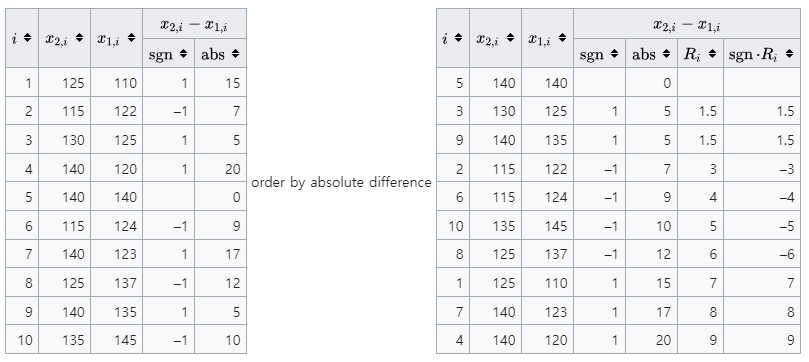

출처: [Wilcoxon signed-rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test)
    
</div>

In [23]:
X =   [110, 122, 125, 120, 140, 124, 123, 137, 135, 145]
X_p = [125, 115, 130, 140, 140, 115, 140, 125, 140, 135]

df_wilcoxon = pd.DataFrame(
    {'X': X,'X_p': X_p}, index = np.arange(1, len(X) + 1)
).assign(
    sgn  = lambda x: np.where(x['X_p'] == x['X'],  0, np.where(x['X_p'] > x['X'], 1, -1)),
    a =  lambda x: (x['X_p'] - x['X']).abs()
).sort_values('a').assign(
    sgnRank = lambda x: x.loc[x['sgn'] != 0].pipe(lambda y: y['sgn'] * y['a'].rank())
)
df_wilcoxon

,X,X_p,sgn,a,sgnRank
5,140,140,0,0,NaN
3,125,130,1,5,1.5
9,135,140,1,5,1.5
2,122,115,-1,7,-3.0
6,124,115,-1,9,-4.0
10,145,135,-1,10,-5.0
8,137,125,-1,12,-6.0
1,110,125,1,15,7.0
7,123,140,1,17,8.0
4,120,140,1,20,9.0


In [24]:
T_plus = df_wilcoxon.loc[df_wilcoxon['sgn'] > 0, 'sgnRank'].sum()
T_minus = -df_wilcoxon.loc[df_wilcoxon['sgn'] < 0, 'sgnRank'].sum()

T = min(T_plus, T_minus)
n = (df_wilcoxon['sgn'] != 0).sum()

mu_T = n * (n + 1) / 4
sigma_T = (n * (n + 1) * (2 * n + 1) / 24) ** 0.5

print("검정통계량(T): {}, pvalue: {}".format(T, norm.cdf(-abs(T_minus - mu_T) / sigma_T) * 2))

검정통계량(T): 18.0, pvalue: 0.5939546753269146


In [25]:
from scipy.stats import wilcoxon
wilcoxon(X, X_p, correction=False, alternative='two-sided',  mode='approx', zero_method='wilcox')

c:\users\강선구\python37\lib\site-packages\scipy\stats\morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=18.0, pvalue=0.5936305914425295)